In [1]:
%matplotlib inline

import os
while 'source' not in os.listdir():
    os.chdir('..')
os.chdir('source')

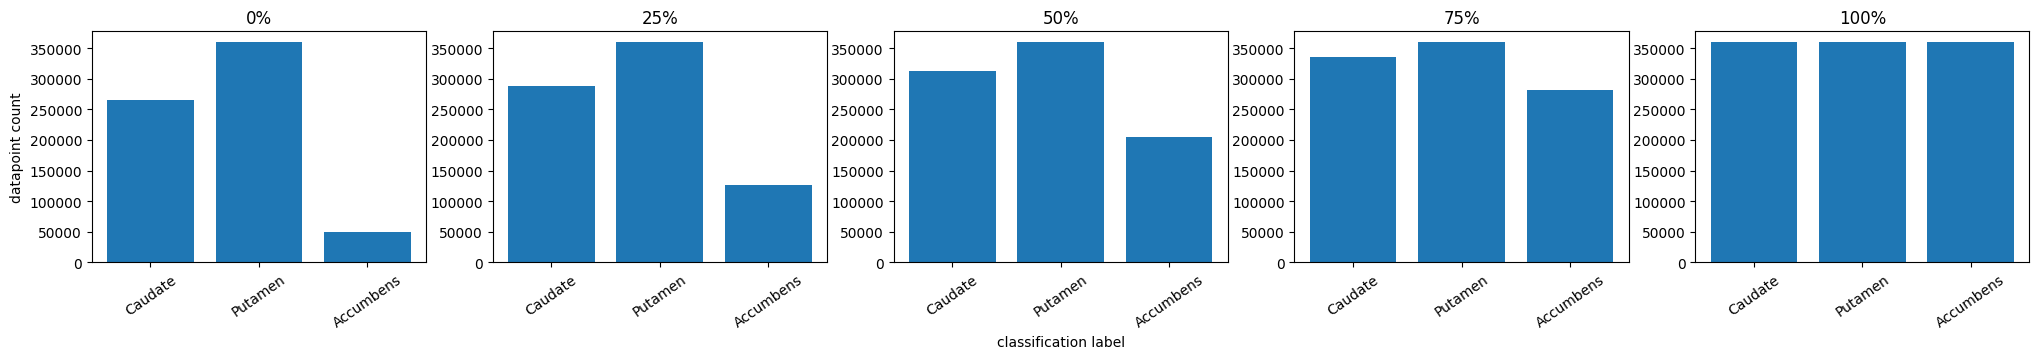

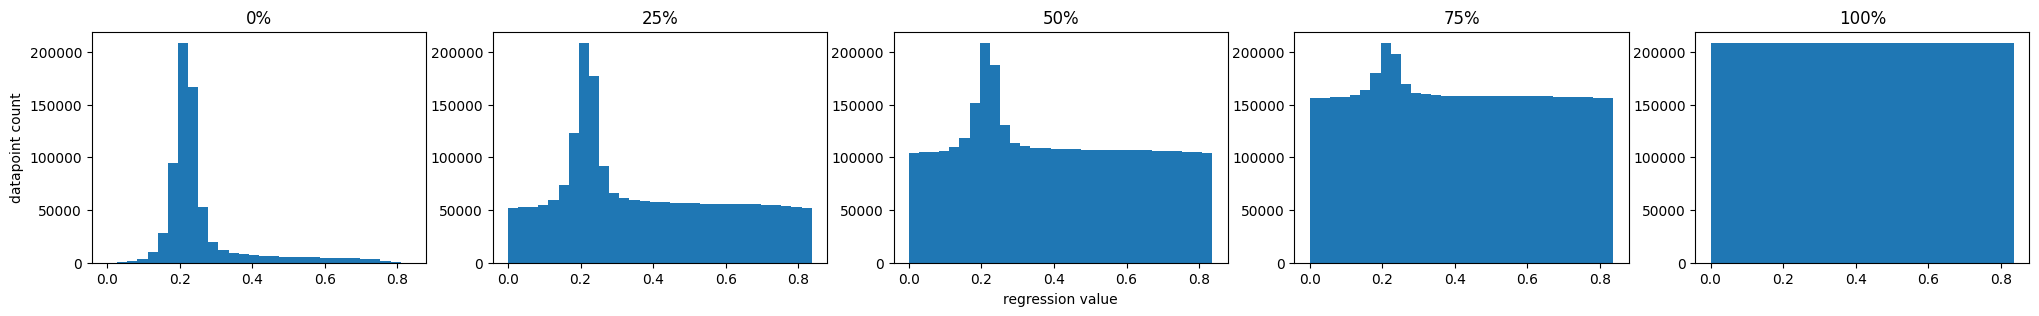

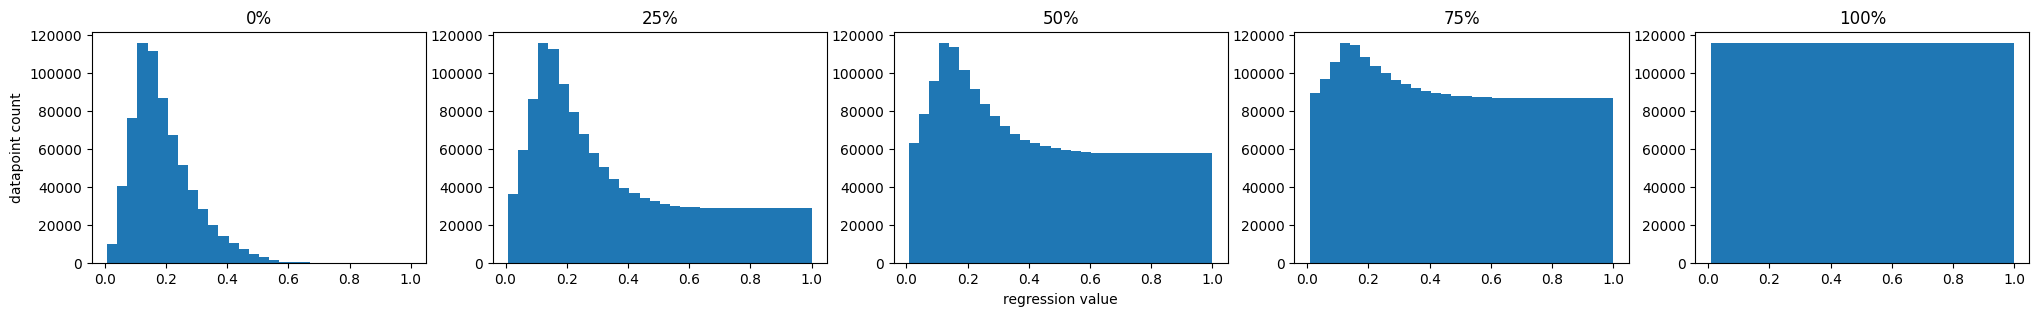

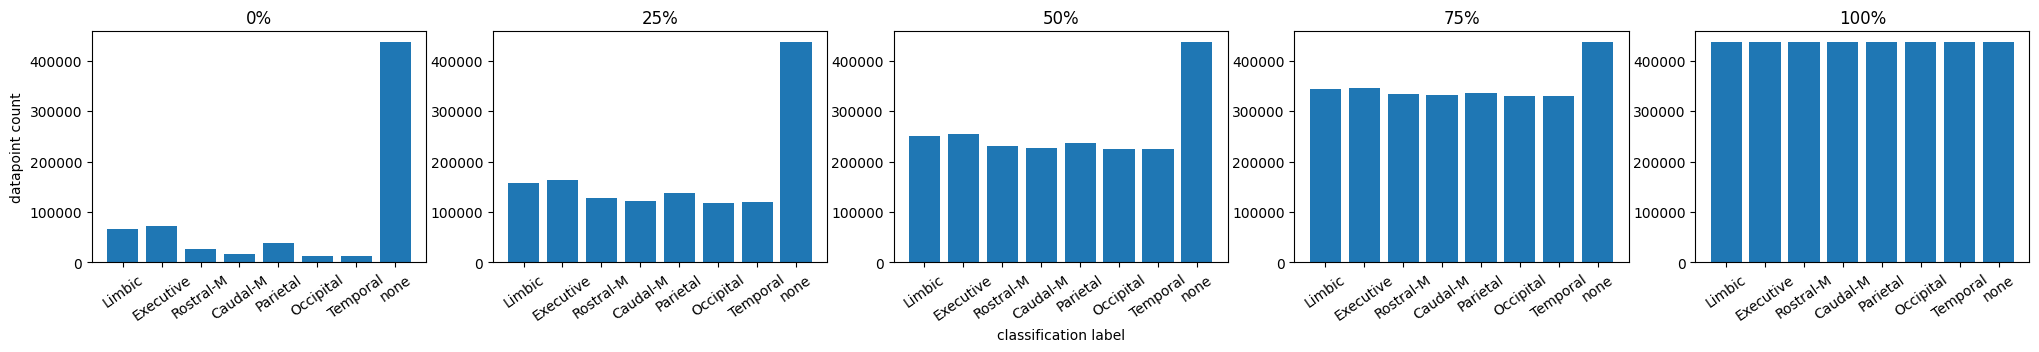

In [2]:
from DataGenerator import DataGenerator
import numpy as np
import matplotlib.pyplot as plt

def balanceHist(y, balance_ratio=1, balance_bins=30):
    if y.shape[1] == 1:
        dat = y[:,0]
        bins, edges = np.histogram(dat,balance_bins)
        bin_masks = np.array([np.logical_and(edges[i] <= dat,dat < edges[i+1]) for i in range(len(bins))])
        bins = np.count_nonzero(bin_masks,1)
        maxbin = np.max(bins)
    else:
        dat = np.argmax(y,1)
        bin_masks = np.array([(dat == i) for i in range(y.shape[-1])])
        bins = np.count_nonzero(bin_masks,1)
        maxbin = np.max(bins)
        edges = list(range(len(bins)+1))
    yc = [y]
    for i in range(len(bins)):
        positive_y = y[bin_masks[i],:]
        bincnt = bins[i]
        if bincnt == 0:
            continue
        remainder = maxbin % bincnt
        remainder = int(remainder * balance_ratio)
        div = maxbin // bincnt - 1
        div = div * balance_ratio
        remainder2 = int(bincnt*(div-int(div)))
        div = int(div)
        if (remainder == 0 and div == 0):
            continue
        if div > 0:
            yc.append(np.repeat(positive_y,div,0))
        if remainder > 0:
            yc.append(positive_y[:remainder,:])
        if remainder2 > 0:
            yc.append(positive_y[-remainder2:,:])
    y = np.concatenate(yc,0)
    if y.shape[1] == 1:
        dat = y[:,0]
        bins2, edges2 = np.histogram(dat,balance_bins)
        bin_masks2 = np.array([np.logical_and(edges2[i] <= dat,dat < edges2[i+1]) for i in range(len(bins2))])
        bins2 = np.count_nonzero(bin_masks2,1)
    else:
        dat = np.argmax(y,1)
        bin_masks2 = np.array([(dat == i) for i in range(y.shape[-1])])
        bins2 = np.count_nonzero(bin_masks2,1)
        edges2 = list(range(len(bins)+1))
    return [[bins,edges],[bins2,edges2]]

def showDists(hists,labels=None):
    fig, p = plt.subplots(1,len(hists))
    p[0].set_ylabel('datapoint count')
    p[2].set_xlabel('classification label'if len(hists[0][0])<10 else'regression value')
    fig.set_size_inches(25, 3)
    for i in range(len(hists)):
        bins1, edges1 = hists[i]
        if len(bins1) == len(edges1):
            bins1 = bins1[0:len(bins1)-1]
        p[i].set_title('{}%'.format(int(i*25)))
        if len(bins1) < 10:
            p[i].bar(range(len(bins1)), bins1, align='center')
            p[i].set_xticks(range(len(bins1)), edges1 if labels is None else labels, rotation=35)
        else:
            p[i].stairs(bins1,edges1,fill=True)
    plt.show()
    plt.close()

d = DataGenerator(not_connected=False,outp='basal_seg',balance_data=False).getData()[0][1]
showDists(balanceHist(d,0.25)+balanceHist(d,0.5)[1:]+balanceHist(d,0.75)[1:]+balanceHist(d,1)[1:],['Caudate','Putamen','Accumbens'])

d = DataGenerator(threshold=None,binarize=False,not_connected=False,outp='diffusion_md',balance_data=False).getData()[0][1]
showDists(balanceHist(d,0.25)+balanceHist(d,0.5)[1:]+balanceHist(d,0.75)[1:]+balanceHist(d,1)[1:])

d = DataGenerator(threshold=None,binarize=False,not_connected=False,outp='diffusion_fa',balance_data=False).getData()[0][1]
showDists(balanceHist(d,0.25)+balanceHist(d,0.5)[1:]+balanceHist(d,0.75)[1:]+balanceHist(d,1)[1:])

d = DataGenerator(not_connected=True,outp='connectivity',balance_data=False).getData()[0][1]
showDists(balanceHist(d,0.25)+balanceHist(d,0.5)[1:]+balanceHist(d,0.75)[1:]+balanceHist(d,1)[1:],['Limbic','Executive','Rostral-M','Caudal-M','Parietal','Occipital','Temporal','none'])